In [419]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.plotting import plot_decision_regions

In [420]:
iris = pd.read_csv('Iris.csv')

In [421]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [422]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.1+ KB


In [423]:
iris.Species.value_counts()

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: Species, dtype: int64

In [424]:
iris.drop('Id', axis=1, inplace=True)
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


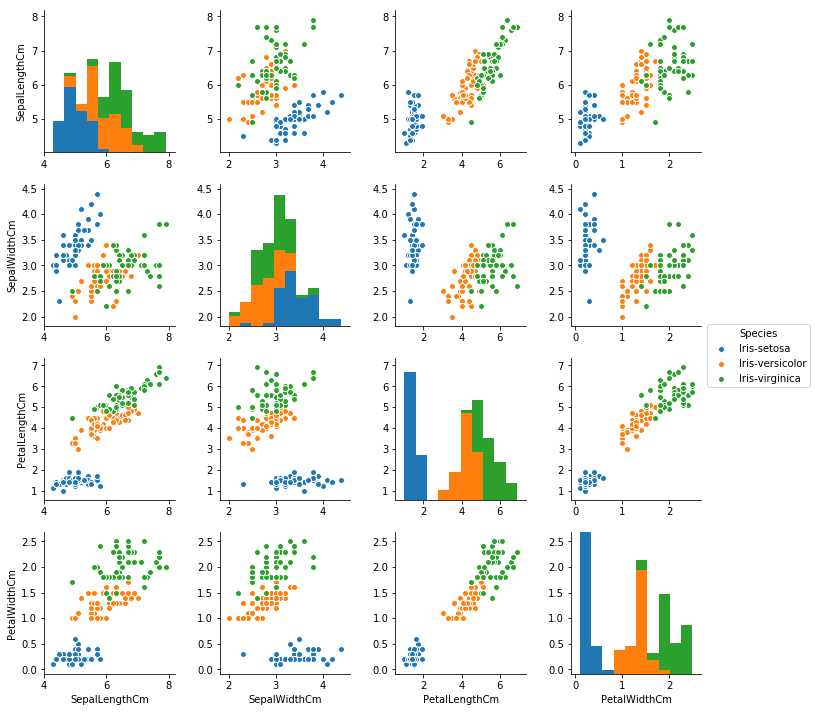

In [425]:
sns.pairplot(iris, hue='Species')
plt.show()

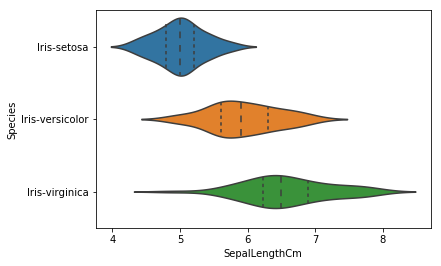

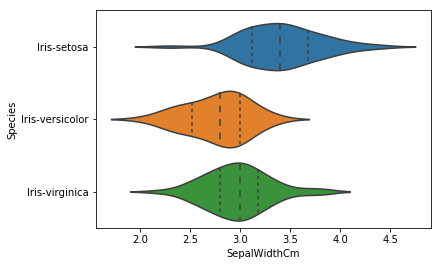

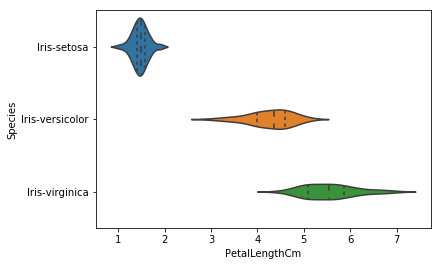

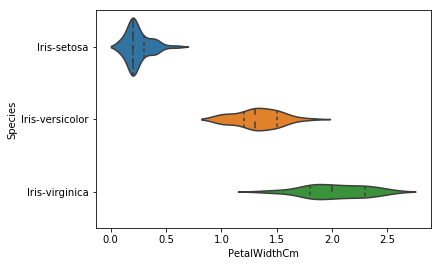

In [426]:
sns.violinplot(y='Species', x='SepalLengthCm', data=iris, inner='quartile')
plt.show()
sns.violinplot(y='Species', x='SepalWidthCm', data=iris, inner='quartile')
plt.show()
sns.violinplot(y='Species', x='PetalLengthCm', data=iris, inner='quartile')
plt.show()
sns.violinplot(y='Species', x='PetalWidthCm', data=iris, inner='quartile')
plt.show()

In [427]:
le = preprocessing.LabelEncoder()
iris.Species = le.fit_transform(iris.Species)
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [428]:
X = iris.drop('Species', axis=1)
y = iris['Species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

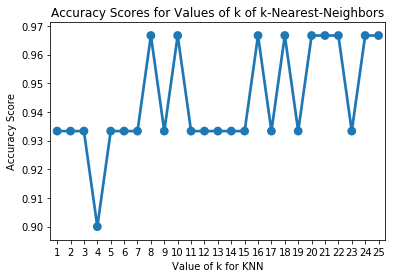

The optimum value of k is 8.


In [429]:
k_range = np.arange(1,26,1)
score = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    score.append(accuracy_score(y_test,y_pred))

optim_k = min(k_range[score==np.max(score)])
sns.pointplot(x=k_range, y=score)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()
print(f'The optimum value of k is {optim_k}.')

In [430]:
knn = KNeighborsClassifier(n_neighbors = optim_k)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy_score(y_pred, y_test)

0.96666666666666667

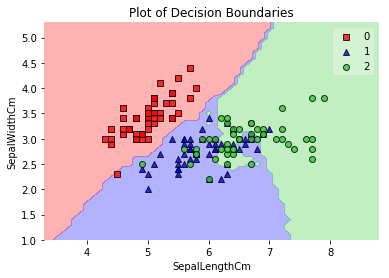

In [435]:
plot_data = np.array(X.loc[:,'SepalLengthCm':'SepalWidthCm'])
plot_target = np.array(y)

knn_plot = KNeighborsClassifier(n_neighbors = optim_k)
knn_plot.fit(plot_data, plot_target)

plot_decision_regions(plot_data, plot_target, clf=knn_plot, res=0.1, legend=1)
plt.title('Plot of Decision Boundaries')
plt.xlabel('SepalLengthCm')
plt.ylabel('SepalWidthCm')
plt.show()